In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
df = pd.read_csv("earthquake_data_tsunami.csv")
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


## 1. Описание набора данных
+ **Предметная область:** сейсмическая активность, риски землетрясений и цунами.  
+ **Источник данных:** https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset  
+ **Характер данных:** реальные.  
+ **Атрибуты:** 
| Атрибуты | Тип данных | Описание |
| --- | --- | --- |
| magnitude | числовой (с плавоющей запятой) | магнитуда землетрясения (шкала Рихтера)|  
| cdi | числовой (целочисленный) | Интенсивность сотрясений (ощущаемая интенсивность) | 
| mmi | числовой (целочисленный) | Модифицированная интенсивность Меркалли (инструментальная) |  
| sig | числовой (целочисленный) | Оценка значимости события |  
| nst | числовой (целочисленный) | Количество станций сейсмического мониторинга |  
| dmin | числовой (с плавоющей запятой) | Расстояние до ближайшей сейсмической станции (градусы) |  
| gap | числовой (с плавоющей запятой) | Азимутальный зазор между станциями (градусы) |  
| depth | числовой (с плавоющей запятой) | Глубина очага землетрясения (км) |  
| latitude | числовой (с плавоющей запятой) | Широта эпицентра (WGS84) |  
| longitude | числовой (с плавоющей запятой) | Долгота эпицентра (WGS84) |  
| Year | числовой (целочисленный) | Год появления |  
| Month | числовой (целочисленный) | Месяц возникновения |  
| tsunami | числовой (целочисленный) | Наличие цунами |  
+ **Задачи анализа:** прогнозирование риска цунами, анализ землетрясений и оценка сейсмической опасности. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


## 2. Анализ атрибутов:

Атрибут: magnitude
Среднее значение: 6.941125319693095
СКО: 0.445514003048737
Количество выбросов: 37
Пропущенные значения: 0
Вариант обработки: не требуется


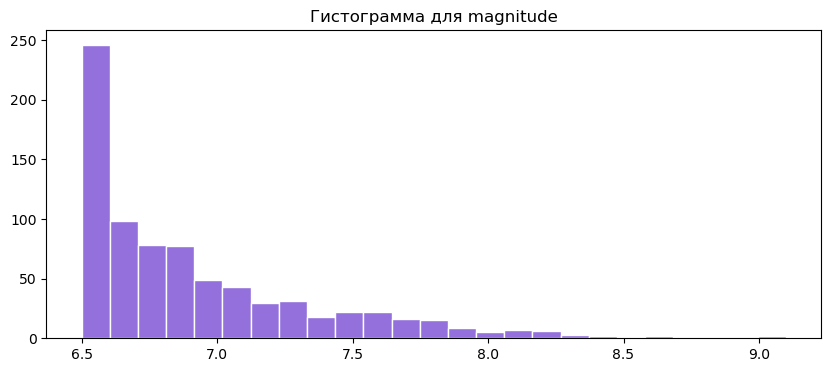

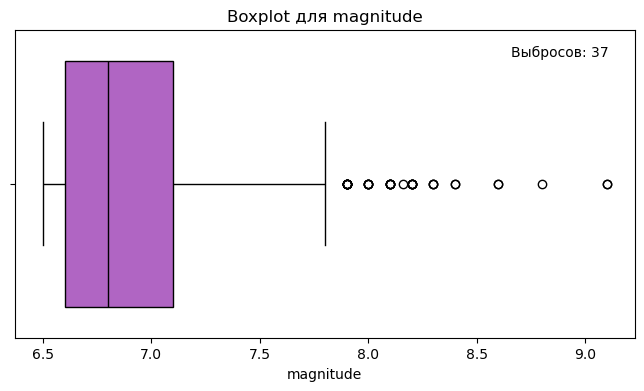

Атрибут: cdi
Среднее значение: 4.333759590792839
СКО: 3.1699389773474027
Количество выбросов: 0
Пропущенные значения: 0
Вариант обработки: не требуется


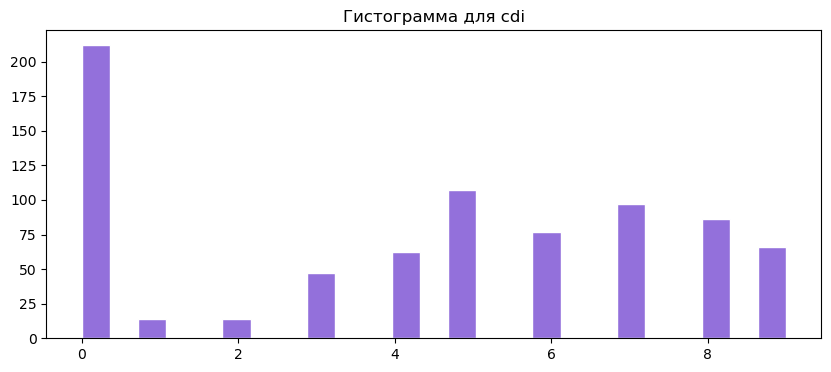

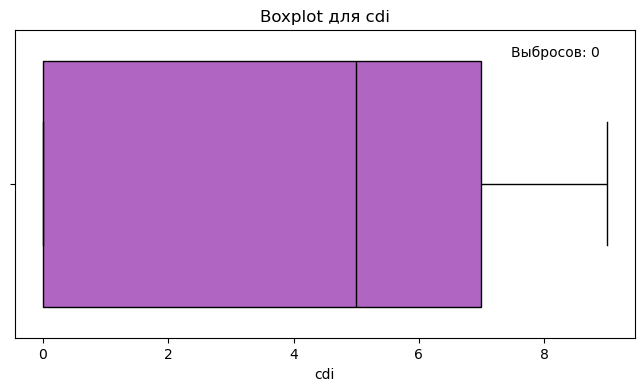

Атрибут: mmi
Среднее значение: 5.964194373401535
СКО: 1.4627239609667393
Количество выбросов: 1
Пропущенные значения: 0
Вариант обработки: не требуется


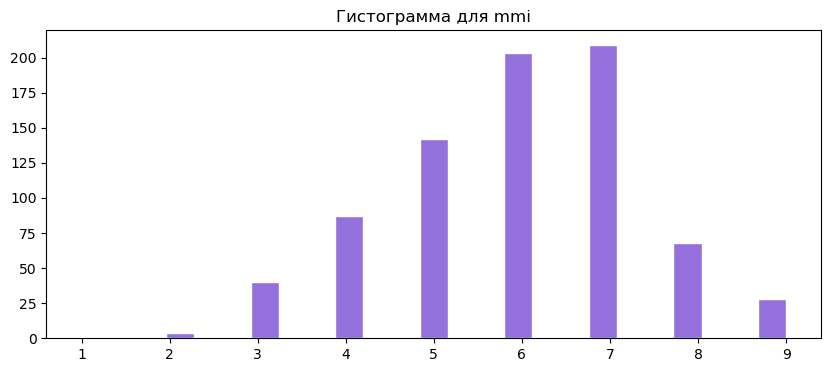

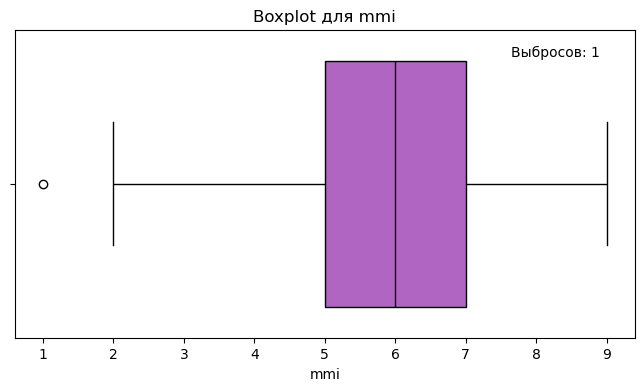

Атрибут: sig
Среднее значение: 870.1086956521739
СКО: 322.46536655267835
Количество выбросов: 73
Пропущенные значения: 0
Вариант обработки: не требуется


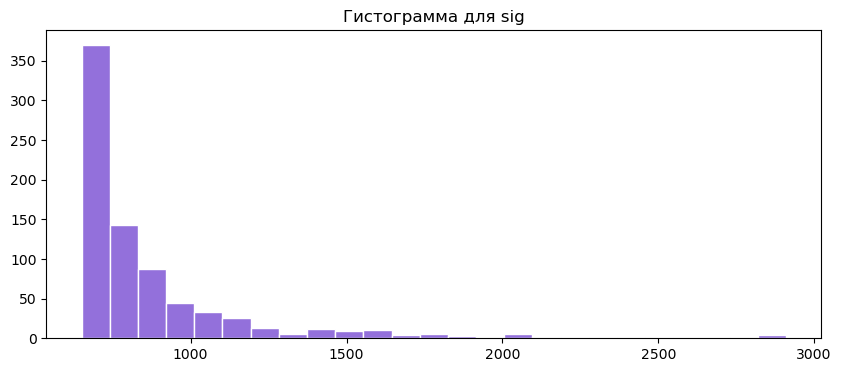

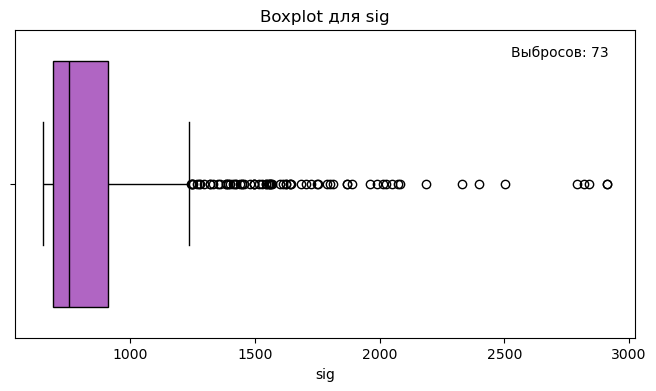

Атрибут: nst
Среднее значение: 230.25063938618925
СКО: 250.1881772572065
Количество выбросов: 0
Пропущенные значения: 0
Вариант обработки: не требуется


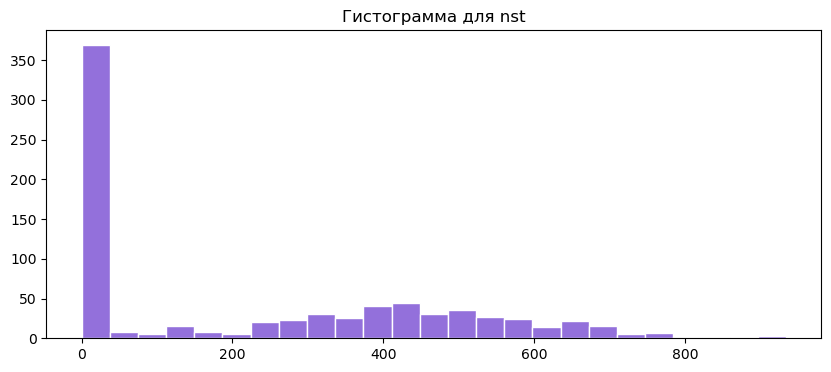

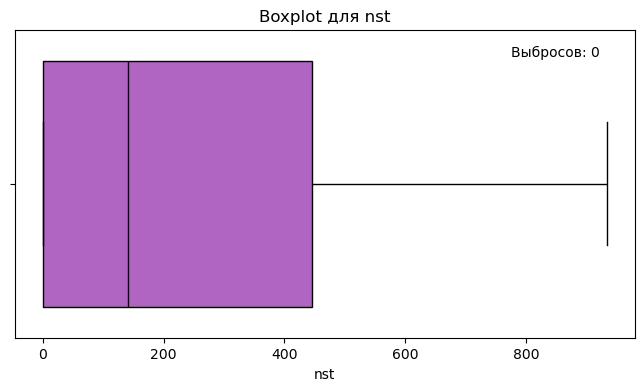

Атрибут: dmin
Среднее значение: 1.3257570626598465
СКО: 2.2188049569049353
Количество выбросов: 61
Пропущенные значения: 0
Вариант обработки: не требуется


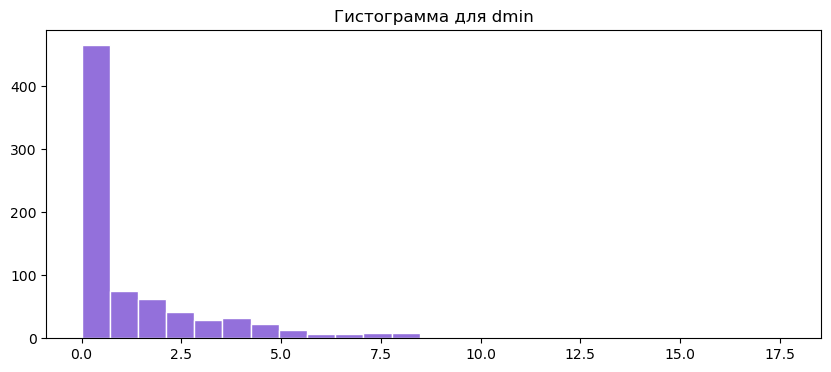

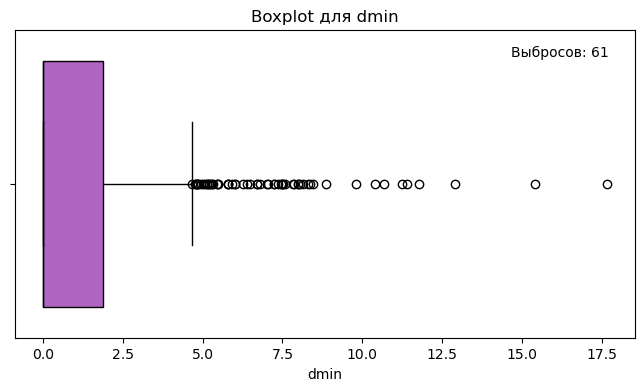

Атрибут: gap
Среднее значение: 25.038989769820972
СКО: 24.225066786738033
Количество выбросов: 48
Пропущенные значения: 0
Вариант обработки: не требуется


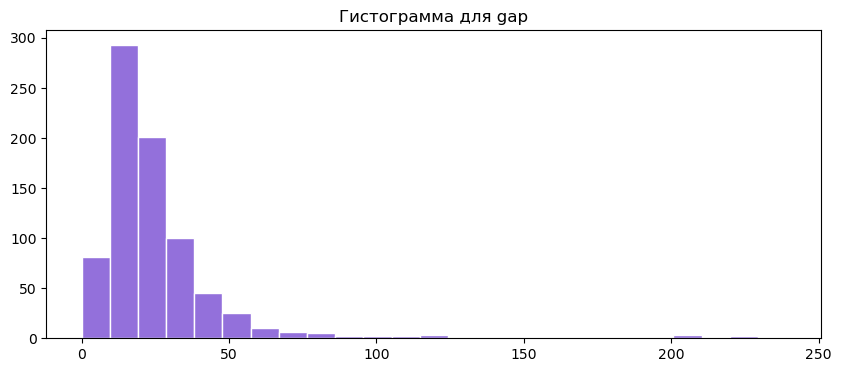

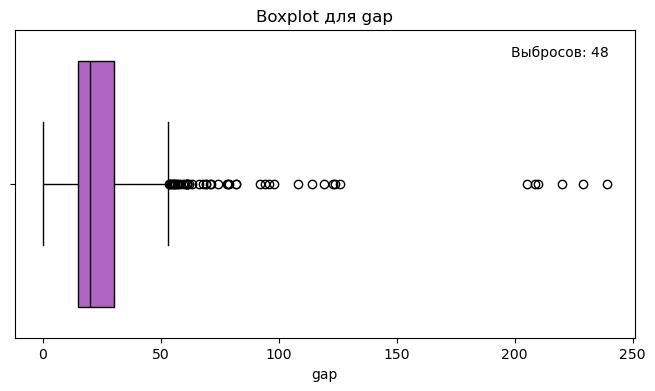

Атрибут: depth
Среднее значение: 75.88319948849104
СКО: 137.2770781927863
Количество выбросов: 139
Пропущенные значения: 0
Вариант обработки: не требуется


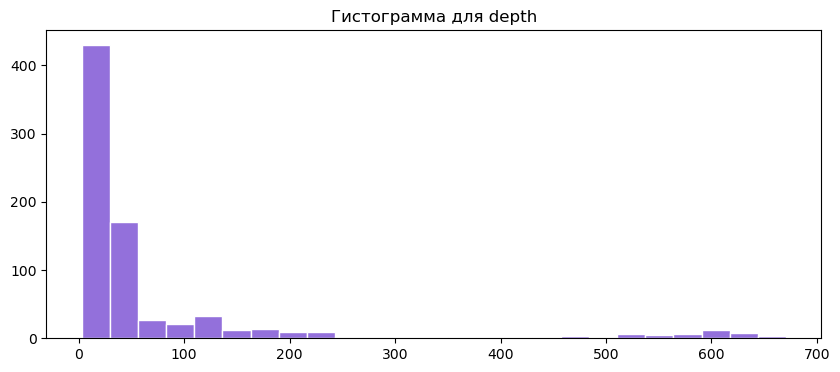

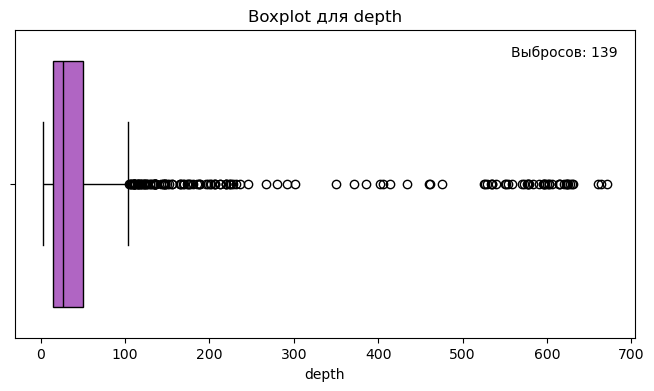

Атрибут: latitude
Среднее значение: 3.5380998721227614
СКО: 27.30342917130246
Количество выбросов: 0
Пропущенные значения: 0
Вариант обработки: не требуется


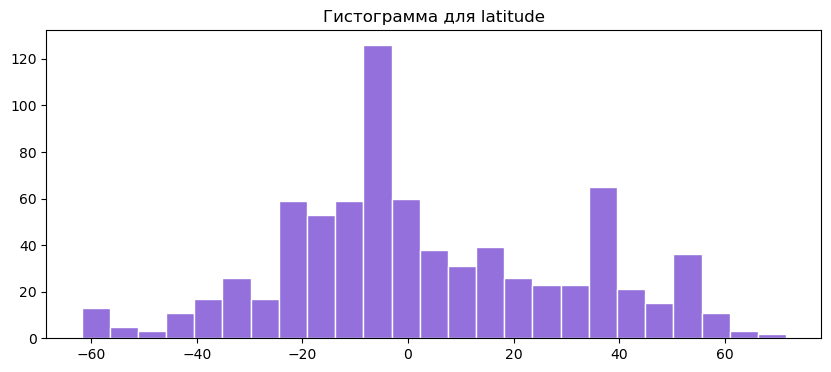

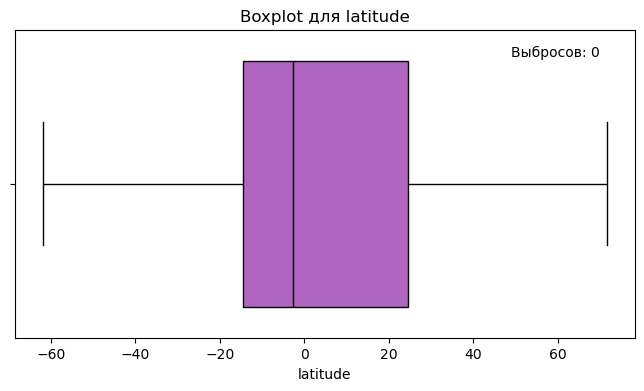

Атрибут: longitude
Среднее значение: 52.609199360613815
СКО: 117.89888599066005
Количество выбросов: 0
Пропущенные значения: 0
Вариант обработки: не требуется


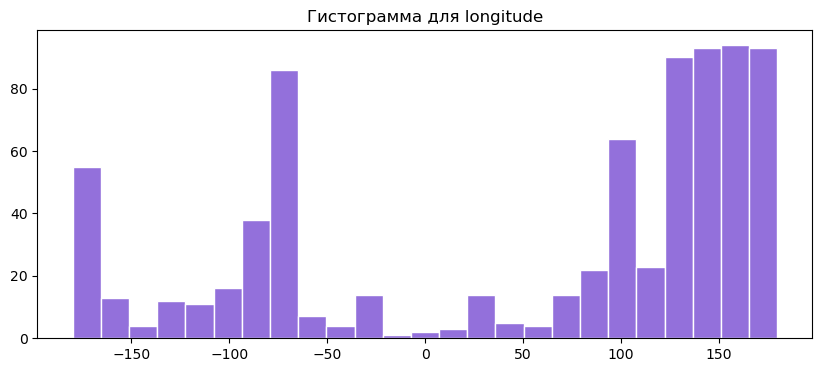

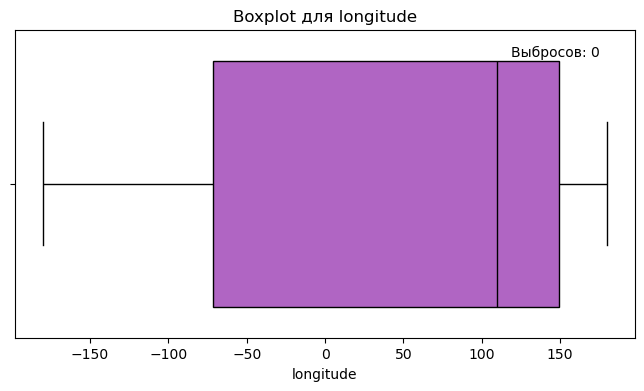

Атрибут: Year
Среднее значение: 2012.2800511508951
СКО: 6.099439406447494
Количество выбросов: 0
Пропущенные значения: 0
Вариант обработки: не требуется


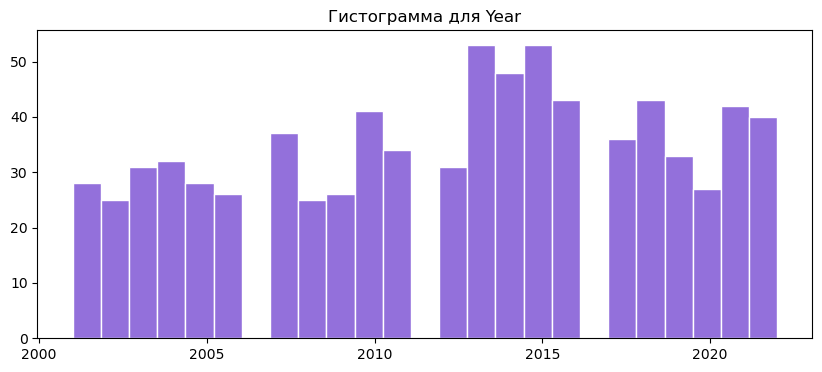

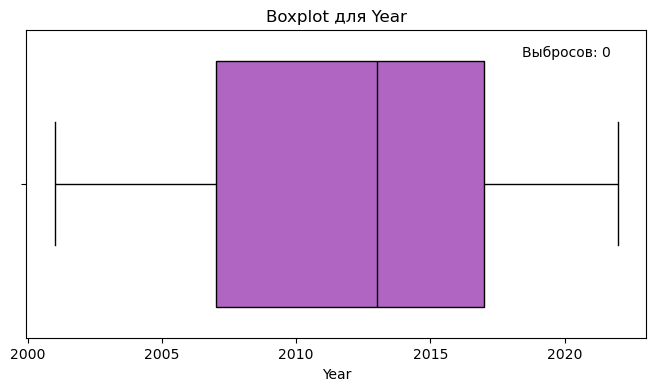

Атрибут: Month
Среднее значение: 6.563938618925831
СКО: 3.5078662415449515
Количество выбросов: 0
Пропущенные значения: 0
Вариант обработки: не требуется


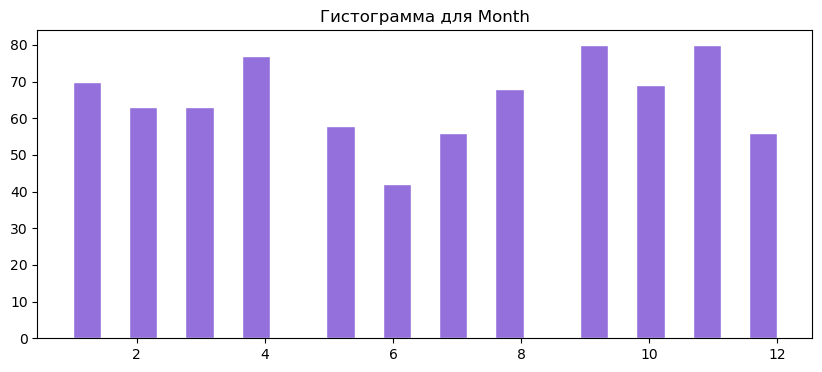

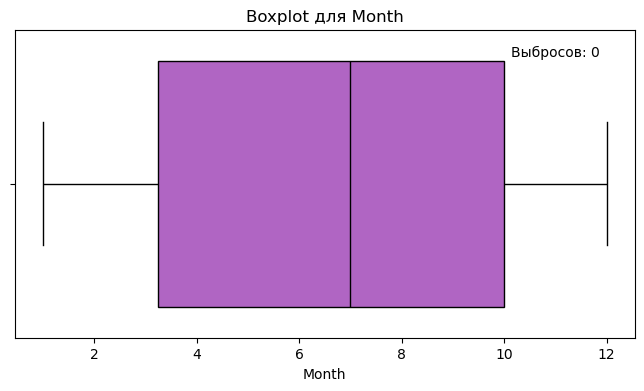

Атрибут: tsunami
Среднее значение: 0.3887468030690537
СКО: 0.48777759340049137
Количество выбросов: 0
Пропущенные значения: 0
Вариант обработки: не требуется


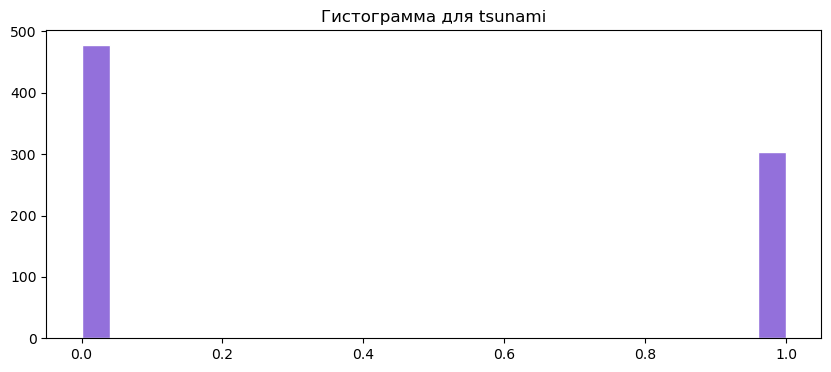

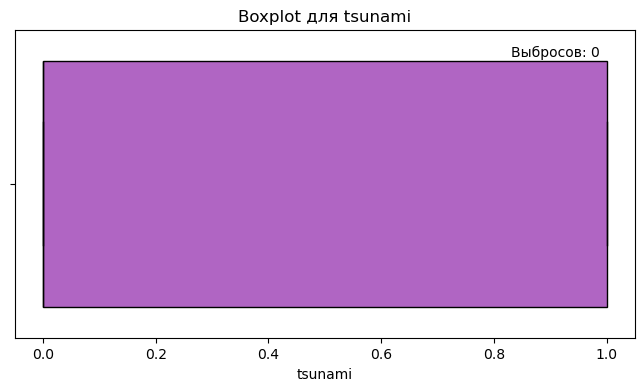

In [4]:
for col in df.columns:
    print(f"Атрибут: {col}")
    print(f"Среднее значение: {df[col].mean()}")
    print(f"СКО: {df[col].std()}")
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    print(f"Количество выбросов: {outliers.shape[0]}")
    print(f"Пропущенные значения: {df[col].isna().sum()}")
    if df[col].isna().sum() > 0: 
        print(f"Вариант обработки: заполнить средним значением")
    else:
        print(f"Вариант обработки: не требуется")
    plt.figure(figsize=(10, 4))
    plt.hist(df[col], bins=25, color='#9370DB', edgecolor='white')
    plt.title(f"Гистограмма для {col}")
    plt.show()
    plt.figure(figsize=(8,4))
    box = sns.boxplot(x=df[col], color='#BA55D3', linecolor='black')
    box.text(0.8, 0.95, f"Выбросов: {outliers.shape[0]}", transform=box.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='left')
    plt.title(f"Boxplot для {col}")
    plt.show()

## 3. Корреляция

In [5]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2).set_caption("Матрица корреляции признаков")

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
magnitude,1.00,0.21,0.29,0.52,0.11,-0.09,-0.11,0.03,-0.01,-0.01,-0.06,-0.01,-0.00
cdi,0.21,1.00,0.32,0.48,-0.18,0.01,0.10,-0.10,0.13,-0.15,0.42,0.01,0.16
mmi,0.29,0.32,1.00,0.44,0.16,-0.30,-0.02,-0.50,0.14,-0.01,-0.21,-0.04,-0.15
sig,0.52,0.48,0.44,1.00,-0.03,-0.10,0.11,-0.09,0.20,-0.19,0.12,-0.03,-0.02
nst,0.11,-0.18,0.16,-0.03,1.00,-0.53,-0.12,-0.12,0.14,0.17,-0.69,-0.01,-0.60
dmin,-0.09,0.01,-0.30,-0.10,-0.53,1.00,-0.02,0.17,-0.24,-0.10,0.53,0.04,0.40
gap,-0.11,0.10,-0.02,0.11,-0.12,-0.02,1.00,-0.11,0.09,-0.31,0.19,-0.02,0.12
depth,0.03,-0.10,-0.50,-0.09,-0.12,0.17,-0.11,1.00,-0.07,-0.04,0.18,0.07,0.06
latitude,-0.01,0.13,0.14,0.20,0.14,-0.24,0.09,-0.07,1.00,0.03,-0.09,-0.06,-0.11
longitude,-0.01,-0.15,-0.01,-0.19,0.17,-0.10,-0.31,-0.04,0.03,1.00,-0.19,0.03,-0.14


Высококоррелированные атрибуты (|r|≥ 0.7):
- отсутствуют
Атрибуты с наиболее сильной корреляцией (|r|> 0.52):
- Year ↔ tsunami: 0.65 (положительная)
- dmin ↔ Year: 0.53 (положительная)
- nst ↔ dmin: -0.53 (отрицательная)
- nst ↔ tsunami: -0.60 (отрицательная)
- nst ↔ Year: -0.69 (отрицательная)
Атрибуты без корреляции (|r| ≤ 0.03):
- longitude ↔ Month: 0.03
- latitude ↔ longitude: 0.03
- cdi ↔ Month: 0.01
- cdi ↔ dmin: 0.01
- magnitude ↔ tsunami: -0.00
- mmi ↔ longitude: -0.01
- magnitude ↔ latitude: -0.01
- magnitude ↔ Month: -0.01
- magnitude ↔ longitude: -0.01
- nst ↔ Month: -0.01
- sig ↔ tsunami: -0.02
- mmi ↔ gap: -0.02
- dmin ↔ gap: -0.02
- Month ↔ tsunami: -0.02
- Year ↔ Month: -0.02
- gap ↔ Month: -0.02
- sig ↔ Month: -0.03


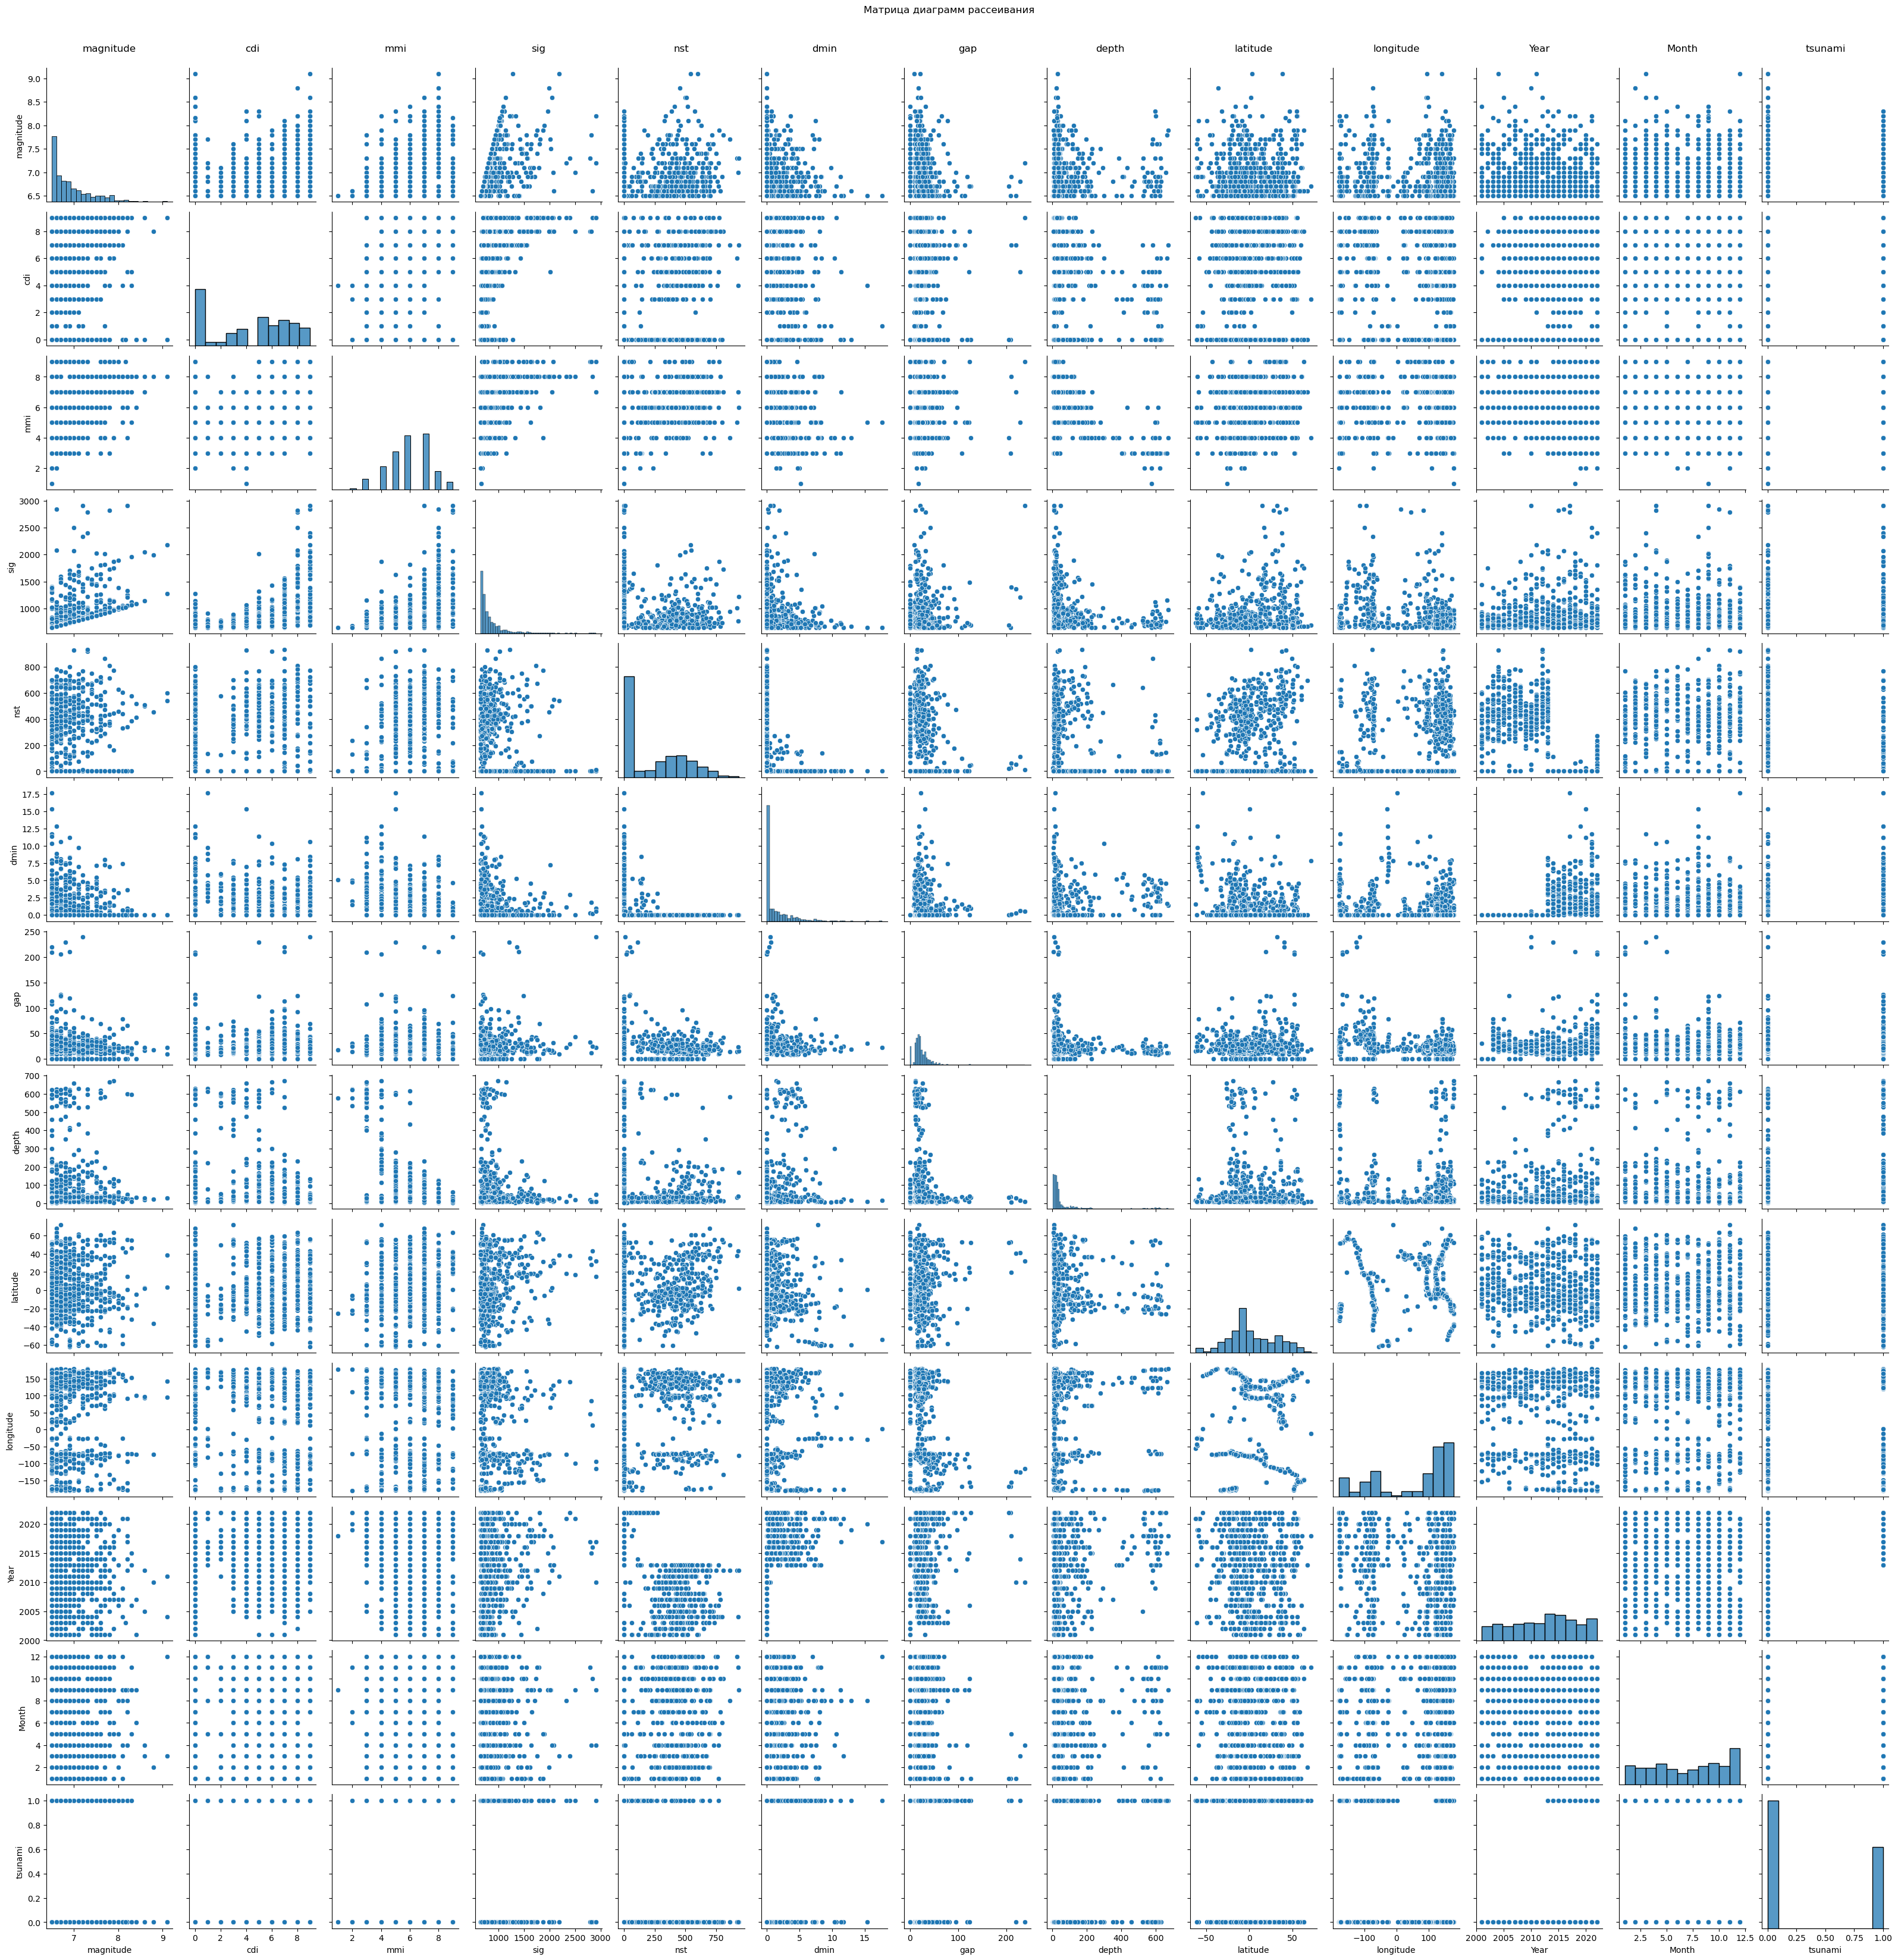

In [6]:
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[(corr_pairs < 1) & (corr_pairs > -1)]
corr_pairs = corr_pairs.drop_duplicates().sort_values(ascending=False)

print("Высококоррелированные атрибуты (|r|≥ 0.7):")
if corr_pairs[abs(corr_pairs) >= 0.7].empty:
    print("- отсутствуют")
else:
    for (attr1, attr2), value in corr_pairs[abs(corr_pairs) >= 0.7].items():
        if value > 0:
            print(f"- {attr1} ↔ {attr2}: {value:.2f} (положительная)")
        else:
            print(f"- {attr1} ↔ {attr2}: {value:.2f} (отрицательная)")
print("Атрибуты с наиболее сильной корреляцией (|r|> 0.52):")
for (attr1, attr2), value in corr_pairs[abs(corr_pairs) > 0.52].items():
        if value > 0:
            print(f"- {attr1} ↔ {attr2}: {value:.2f} (положительная)")
        else:
            print(f"- {attr1} ↔ {attr2}: {value:.2f} (отрицательная)")
print("Атрибуты без корреляции (|r| ≤ 0.03):")
if corr_pairs[abs(corr_pairs) < 0.1].empty:
    print("- нет")
else:
    for (attr1, attr2), value in corr_pairs[abs(corr_pairs) <= 0.03].items():
        print(f"- {attr1} ↔ {attr2}: {value:.2f}")
        
matrix = sns.pairplot(df.select_dtypes(include='number'))
for i, col in enumerate(df.columns):
    matrix.axes[0, i].set_title(col, pad=20)
plt.suptitle('Матрица диаграмм рассеивания', y=1.02)
plt.show()

### Анализ полученных результаов: 
Проведенный анализ показал отсутсвие в наборе данных пар признаков с высокой степенью корреляции. Это позволяет сделать вывод о том, что сильных зависимостей между атрибутами нет.  
Однако можно выделить несколько пар с *наиболее сильной зависимойстью*:  
+ **nst ↔ dmin** (r = −0.53, отрицательная): чем больше расстояние до ближайшей станции, тем меньше станций фиксируют землетрясение;
+ **nst ↔ tsunami** (r = −0.60, отрицательная): землетрясения, сопровождающиеся цунами, фиксируются меньшим числом станций;
+ **Year ↔ tsunami** (r = 0.65, положительная): с течением времени возрастает число землетрясений, сопровождающихся цунами; 
+ **dmin ↔ Year** (r = 0.53, положительная): с годами среднее расстояние до ближайшей станции увеличивается;
+ **nst ↔ Year** (r = −0.69, отрицательная): с течением времени количество станций, регистрирующих землетрясение, уменьшается.
   
Практически нулевая степень корреляции у таких пар атрибутов, как **magnitude ↔ tsunami**, **cdi ↔ dmin**, **magnitude ↔ latitude**, **magnitude ↔ longitude**, **sig ↔ tsunami** и т.д. показывает, что между этими параметрами нет устойчивой взаимосвязи. Так, например, **magnitude ↔ tsunami** (r = -0.00) означает, что возникновение цунами не связано напрямую с магнитудой землетрясения.